In [1]:
import xmltodict
import json
import requests
import pandas as pd
import numpy as np
from pandas import json_normalize
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# HOMEWORK 3

(For this homework, we are going to use the [data warehouse](https://clerk.house.gov/Votes/) for the [US House of Representatives](https://www.house.gov/). The data server has data on each vote going back to 1990. The voting information is in XML format. Pull all the data from 1990 to 2023, and store it for questions below. )

## Q1

1. Not all of the roll calls are votes. For example, some roll calls are QUORUMs (yoklama). For each year, find out the legislator and his/her state who were absent the most.
2. For each year and for each state find out how many legislators there are. For example, in 1990 California had 45 legislators while Vermont had 1.
3. Create a data frame with the following columns:
   - Year
   - State
   - Name of the Legislator
   - His/her party affiliation (Democrat/Republican/Independent)
   - Number of times he/she voted
   - Number of times he/she did not vote
5. Find out who is the longest serving legislator in the US House representative.

## Q1-ANSWER

In this homework, as the size of data is big, i pull the data in 2 part. Collected in 'data2' list, save as 'data2.json' to my local. Then read the file and by using normalization methods, convert data to usable dataframe(new_df). As data2.json file is too big to upload to Github, saved df(new_df) as a parquet file to local, and uploaded to Github. Commented lines that no need to run, you can just directly read parquet file.

In [2]:
""" base_url = "https://clerk.house.gov/evs/{}/roll{}.xml"
data2 = []
# loop for calls between 1990-2010
for year in range(1990, 2010):
    roll_number = 1  # roll number starting point

    while True:
        formatted_url = base_url.format(year, "%03d" % roll_number) # formatting number to be suitable for url form
        
        response = requests.get(formatted_url)
        if response.status_code != 200: # as we dont know the last call for that year
            break
        xml_dict = xmltodict.parse(response.content) # keep response as a dict
        data2.append(xml_dict) # added to list

        roll_number += 1  # next roll number
        response.close()
"""

' base_url = "https://clerk.house.gov/evs/{}/roll{}.xml"\ndata2 = []\n# loop for calls between 1990-2010\nfor year in range(1990, 2010):\n    roll_number = 1  # roll number starting point\n\n    while True:\n        formatted_url = base_url.format(year, "%03d" % roll_number) # formatting number to be suitable for url form\n        \n        response = requests.get(formatted_url)\n        if response.status_code != 200: # as we dont know the last call for that year\n            break\n        xml_dict = xmltodict.parse(response.content) # keep response as a dict\n        data2.append(xml_dict) # added to list\n\n        roll_number += 1  # next roll number '

In [3]:
""" base_url2 = "https://clerk.house.gov/evs/{}/roll{}.xml"

for year2 in range(2010, 2024):  
    roll_number2 = 1 

    while True:
        formatted_url2 = base_url2.format(year2, "%03d" % roll_number2)
        
        response2 = requests.get(formatted_url2)
        if response2.status_code != 200:
            break
        xml_dict2 = xmltodict.parse(response2.content)
        data2.append(xml_dict2)

        roll_number2 += 1   """

' base_url2 = "https://clerk.house.gov/evs/{}/roll{}.xml"\n\nfor year2 in range(2010, 2024):  \n    roll_number2 = 1 \n\n    while True:\n        formatted_url2 = base_url2.format(year2, "%03d" % roll_number2)\n        \n        response2 = requests.get(formatted_url2)\n        if response2.status_code != 200:\n            break\n        xml_dict2 = xmltodict.parse(response2.content)\n        data2.append(xml_dict2)\n\n        roll_number2 += 1   '

In [4]:
""" with open('data2.json', 'w', encoding='utf-8') as json_file:
        json.dump(data2, json_file, ensure_ascii=False, indent=4) """

" with open('data2.json', 'w', encoding='utf-8') as json_file:\n        json.dump(data2, json_file, ensure_ascii=False, indent=4) "

In [5]:
""" with open('data2.json', 'r', encoding='utf-8') as file:
    ds = json.load(file) """

" with open('data2.json', 'r', encoding='utf-8') as file:\n    ds = json.load(file) "

In [6]:
""" dfs = []
for item in ds:
    rollcall_vote_data = item.get('rollcall-vote', {})  # 'rollcall-vote' data
    df = json_normalize(rollcall_vote_data)
    dfs.append(df)

result_df = pd.concat(dfs, ignore_index=True) # merge dfs
 """

" dfs = []\nfor item in ds:\n    rollcall_vote_data = item.get('rollcall-vote', {})  # 'rollcall-vote' data\n    df = json_normalize(rollcall_vote_data)\n    dfs.append(df)\n\nresult_df = pd.concat(dfs, ignore_index=True) # merge dfs\n "

In [7]:
""" new_df=pd.DataFrame(result_df)
new_df['vote-metadata.action-date']=pd.to_datetime(new_df['vote-metadata.action-date']) # convert datetime
new_df['Year']=new_df['vote-metadata.action-date'].dt.year # take year as a seperate column
new_df.head() """


" new_df=pd.DataFrame(result_df)\nnew_df['vote-metadata.action-date']=pd.to_datetime(new_df['vote-metadata.action-date']) # convert datetime\nnew_df['Year']=new_df['vote-metadata.action-date'].dt.year # take year as a seperate column\nnew_df.head() "

In [8]:
""" new_df.to_parquet('us_data.parquet') """

" new_df.to_parquet('us_data.parquet') "

In [9]:
df_from_parquet = pd.read_parquet('us_data.parquet')

In [10]:
df_from_parquet.head()

,vote-metadata.majority,vote-metadata.congress,vote-metadata.session,vote-metadata.chamber,vote-metadata.rollcall-num,vote-metadata.legis-num,vote-metadata.vote-question,vote-metadata.vote-type,vote-metadata.vote-result,vote-metadata.action-date,...,vote-metadata.vote-totals.totals-by-vote.not-voting-total,vote-data.recorded-vote,vote-metadata.amendment-num,vote-metadata.amendment-author,vote-metadata.vote-totals.totals-by-candidate,vote-metadata.vote-correction,vote-metadata.committee,vote-data,vote-metadata.action-time,Year
0,D,101,2nd,U.S. House of Representatives,1,QUORUM 1,Call of the House,QUORUM,Passed,1990-01-23,...,54,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
1,D,101,2nd,U.S. House of Representatives,2,MOTION,On Approving the Journal,YEA-AND-NAY,Passed,1990-01-24,...,27,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
2,D,101,2nd,U.S. House of Representatives,3,H R 2712,REFER BILL AND VETO JOINTLY TO FOREIGN AFFAIRS...,YEA-AND-NAY,Failed,1990-01-24,...,18,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
3,D,101,2nd,U.S. House of Representatives,4,H R 2712,ON PRESIDENTIAL VETO,2/3 YEA-AND-NAY,Passed,1990-01-24,...,16,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
4,D,101,2nd,U.S. House of Representatives,5,MOTION,On Approving the Journal,YEA-AND-NAY,Passed,1990-01-31,...,29,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990


QUORUMs roll calls:

In [11]:
quorum=df_from_parquet[df_from_parquet['vote-metadata.vote-type']=='QUORUM'].reset_index(drop=True)
quorum.head()

,vote-metadata.majority,vote-metadata.congress,vote-metadata.session,vote-metadata.chamber,vote-metadata.rollcall-num,vote-metadata.legis-num,vote-metadata.vote-question,vote-metadata.vote-type,vote-metadata.vote-result,vote-metadata.action-date,...,vote-metadata.vote-totals.totals-by-vote.not-voting-total,vote-data.recorded-vote,vote-metadata.amendment-num,vote-metadata.amendment-author,vote-metadata.vote-totals.totals-by-candidate,vote-metadata.vote-correction,vote-metadata.committee,vote-data,vote-metadata.action-time,Year
0,D,101,2nd,U.S. House of Representatives,1,QUORUM 1,Call of the House,QUORUM,Passed,1990-01-23,...,54,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
1,D,101,2nd,U.S. House of Representatives,23,QUORUM 23,Call of the House,QUORUM,Passed,1990-03-14,...,31,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
2,D,101,2nd,U.S. House of Representatives,26,QUORUM 26,Call of the House,QUORUM,Passed,1990-03-15,...,47,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
3,D,101,2nd,U.S. House of Representatives,41,QUORUM 41,Call of the House,QUORUM,Passed,1990-03-27,...,33,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
4,D,101,2nd,U.S. House of Representatives,48,QUORUM 48,Call of the House,QUORUM,Passed,1990-03-28,...,20,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990


As we can see 'vote-data.recorded-vote' columns has values as a list.We need to convert it to readable dataframe with date column in order to do necessary manipulations:

In [12]:
def split_vote(df,colname):
    merged_dfs=[]
    num=df.shape[0]
    for i in range(num):
        each_record=df[colname][i]
        if type(each_record)== float: # beacuse some of recorded vote lists returned float type nan
            continue
        splitted=pd.json_normalize(each_record)
        splitted['date']=df['vote-metadata.action-date'][i]
        splitted['Year'] = splitted['date'].dt.year
        merged_dfs.append(splitted)
    final_df = pd.concat(merged_dfs, ignore_index=True)
    return final_df

In [13]:
quorum_votes=split_vote(quorum,'vote-data.recorded-vote')

In [14]:
quorum_votes.head()

,vote,legislator.#text,legislator.@name-id,legislator.@party,legislator.@role,legislator.@sort-field,legislator.@state,legislator.@unaccented-name,date,Year
0,Present,Ackerman,None,D,legislator,None,NY,None,1990-01-23,1990
1,Present,Akaka,None,D,legislator,None,HI,None,1990-01-23,1990
2,Present,Alexander,None,D,legislator,None,AR,None,1990-01-23,1990
3,Present,Anderson,None,D,legislator,None,CA,None,1990-01-23,1990
4,Present,Andrews (TX),None,D,legislator,None,TX,None,1990-01-23,1990


Absent counts grouped by legislator,Year, and State:

In [15]:

absent_df = quorum_votes[quorum_votes['vote'] == 'Not Voting']

#  count occurrences of absent
absent_counts = absent_df.groupby(['legislator.#text', 'Year','legislator.@state']).size().reset_index(name='Absent_Count')

print(absent_counts)

     legislator.#text  Year legislator.@state  Absent_Count
0         Abercrombie  1991                HI             2
1         Abercrombie  1992                HI             1
2         Abercrombie  1993                HI             2
3         Abercrombie  1996                HI             1
4         Abercrombie  2000                HI             2
...               ...   ...               ...           ...
3260      de la Garza  1990                TX             2
3261      de la Garza  1992                TX             4
3262      de la Garza  1993                TX             3
3263      de la Garza  1994                TX             1
3264      de la Garza  1995                TX             1

[3265 rows x 4 columns]


The legislator and his/her state who were absent the most fro each year:

In [16]:
max_absent_legislators_id=absent_counts.groupby('Year')['Absent_Count'].idxmax()
max_absent_legislators = absent_counts.loc[max_absent_legislators_id]
max_absent_legislators

,legislator.#text,Year,legislator.@state,Absent_Count
995,Frank (MA),1990,MA,22
996,Frank (MA),1991,MA,15
997,Frank (MA),1992,MA,14
998,Frank (MA),1993,MA,17
999,Frank (MA),1994,MA,10
1000,Frank (MA),1995,MA,17
3,Abercrombie,1996,HI,1
1001,Frank (MA),1997,MA,6
1002,Frank (MA),1998,MA,14
2827,Stark,1999,CA,2


For each year and for each state, number of legislators:

In [17]:
legislator_counts = quorum_votes.groupby(['Year','legislator.@state'])['legislator.#text'].nunique().reset_index(name='legislator_Count')
legislator_counts

,Year,legislator.@state,legislator_Count
0,1990,AK,1
1,1990,AL,7
2,1990,AR,4
3,1990,AZ,5
4,1990,CA,45
...,...,...,...
1698,2023,VT,1
1699,2023,WA,10
1700,2023,WI,8
1701,2023,WV,2


Data frame with the following columns:

-Year

-State

-Name of the Legislator

-His/her party affiliation (Democrat/Republican/Independent)

-Number of times he/she voted

-Number of times he/she did not vote

In [20]:
vote_counts = quorum_votes.groupby(['Year', 'legislator.@state', 'legislator.#text', 'legislator.@party', 'vote']).size().unstack(fill_value=0).reset_index()

# Rename the columns
vote_counts.columns.name = None  # Remove the name of columns' index
vote_counts = vote_counts.rename(columns={'Present': 'Number of times voted', 'Not Voting': 'Number of times did not vote'})
vote_counts

,Year,legislator.@state,legislator.#text,legislator.@party,Number of times did not vote,Number of times voted
0,1990,AK,Young (AK),R,7,18
1,1990,AL,Bevill,D,2,23
2,1990,AL,Browder,D,0,25
3,1990,AL,Callahan,R,1,24
4,1990,AL,Dickinson,R,4,21
...,...,...,...,...,...,...
14834,2023,WI,Tiffany,R,0,5
14835,2023,WI,Van Orden,R,2,3
14836,2023,WV,Miller (WV),R,0,5
14837,2023,WV,Mooney,R,0,5


In order to find the longest serving legislator, first we will find the year of services of each legislator:

In [21]:
legislator_years = quorum_votes.groupby('legislator.#text')['Year'].nunique().reset_index(name='Years_of_Service')
legislator_years

,legislator.#text,Years_of_Service
0,Abercrombie,20
1,Abraham,6
2,Ackerman,23
3,Adams,11
4,Aderholt,27
...,...,...
1708,Zeliff,6
1709,Zimmer,6
1710,Zinke,4
1711,de Lugo (VI),2


Then, find the longest serving legislator:

In [22]:
longest_serving_legislator = legislator_years.loc[legislator_years['Years_of_Service'].idxmax()]
longest_serving_legislator

legislator.#text    Bilirakis
Years_of_Service           34
Name: 107, dtype: object

## Q2

For this question, we are going to measure polarization in the US Congress.

For this specific vote example above, the YEAS and NAYS are tabulated as follows:


|             |  YEAs   |  NAYs  |
|-------------|---------|--------|
| Democrats   |    234  |     2  |
| Republicans |     78  |    87  |


We are going to measure **polarization** by the following formula

$$ \frac{|\text{Difference in YEAs}| + |\text{Difference in NAYs}|}{\text{Total number of votes}} $$

For this particular vote the polarization is

$$ \frac{|234-78|+|2-87|}{234+78+2+87} \approx 0.6 $$

1. Measure polarization for each roll call and store it in a data frame with the date information.
2. Plot the results against time.
3. Analyze the results. Did polarization increase, decrease, or stayed the same?

## Q2-ANSWER

To meausure the polarization, we are not going to use quorum calls and also we should drop the empty vote rows:

In [23]:
cleaned_votes = df_from_parquet[(df_from_parquet['vote-metadata.vote-type'] != 'QUORUM') & (df_from_parquet['vote-metadata.vote-totals.totals-by-party'].isna() == False)].reset_index(drop=True)

In [24]:
cleaned_votes.head()

,vote-metadata.majority,vote-metadata.congress,vote-metadata.session,vote-metadata.chamber,vote-metadata.rollcall-num,vote-metadata.legis-num,vote-metadata.vote-question,vote-metadata.vote-type,vote-metadata.vote-result,vote-metadata.action-date,...,vote-metadata.vote-totals.totals-by-vote.not-voting-total,vote-data.recorded-vote,vote-metadata.amendment-num,vote-metadata.amendment-author,vote-metadata.vote-totals.totals-by-candidate,vote-metadata.vote-correction,vote-metadata.committee,vote-data,vote-metadata.action-time,Year
0,D,101,2nd,U.S. House of Representatives,2,MOTION,On Approving the Journal,YEA-AND-NAY,Passed,1990-01-24,...,27,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
1,D,101,2nd,U.S. House of Representatives,3,H R 2712,REFER BILL AND VETO JOINTLY TO FOREIGN AFFAIRS...,YEA-AND-NAY,Failed,1990-01-24,...,18,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
2,D,101,2nd,U.S. House of Representatives,4,H R 2712,ON PRESIDENTIAL VETO,2/3 YEA-AND-NAY,Passed,1990-01-24,...,16,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
3,D,101,2nd,U.S. House of Representatives,5,MOTION,On Approving the Journal,YEA-AND-NAY,Passed,1990-01-31,...,29,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990
4,D,101,2nd,U.S. House of Representatives,6,H RES 309,On Agreeing to the Resolution,YEA-AND-NAY,Passed,1990-01-31,...,11,"[{'legislator': {'#text': 'Ackerman', '@name-i...",None,None,None,None,None,None,None,1990


In [25]:
def calculate_polarization(data_dict):
    try:
        
        yea_rep = [int(i['yea-total']) for i in data_dict if i['party'] == 'Republican'][0]
        no_rep = [int(i['nay-total']) for i in data_dict if i['party'] == 'Republican'][0]
        yea_dem = [int(i['yea-total']) for i in data_dict if i['party'] == 'Democratic'][0]
        no_dem = [int(i['nay-total']) for i in data_dict if i['party'] == 'Democratic'][0]


        total_votes = yea_rep+ no_rep+ yea_dem+ no_dem

        if total_votes == 0:
            return 0.0  # Return 0.0 when the total votes are zero to avoid division by zero

        polarization = (abs(yea_rep - yea_dem) + abs(no_rep - no_dem)) / total_votes
        return round(polarization, 1)
    except Exception as e:
        print(f"Error: {e}")
        return None


In [26]:
polarization_df= cleaned_votes[['vote-metadata.action-date','vote-metadata.vote-totals.totals-by-party']]
polarization_df['polarization'] = polarization_df['vote-metadata.vote-totals.totals-by-party'].apply(calculate_polarization)
polarization =polarization_df.drop('vote-metadata.vote-totals.totals-by-party',axis=1)
polarization


C:\Users\user\AppData\Local\Temp\ipykernel_8648\4274838958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarization_df['polarization'] = polarization_df['vote-metadata.vote-totals.totals-by-party'].apply(calculate_polarization)


,vote-metadata.action-date,polarization
0,1990-01-24,0.6
1,1990-01-24,0.8
2,1990-01-24,0.3
3,1990-01-31,0.6
4,1990-01-31,1.0
...,...,...
21063,2023-11-30,0.6
21064,2023-11-30,1.0
21065,2023-11-30,1.0
21066,2023-12-01,1.0


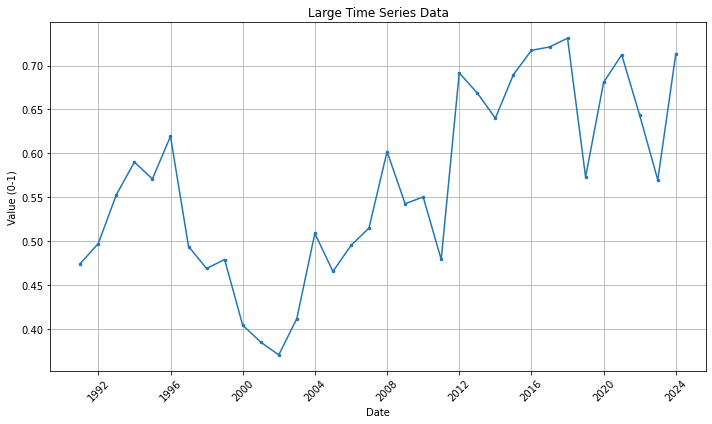

In [27]:

polarization_df.set_index('vote-metadata.action-date', inplace=True)
downsampled = polarization_df.resample('1Y').mean()  # As there are too much data, show them yearly


plt.figure(figsize=(10, 6))
plt.plot(downsampled.index, downsampled['polarization'], linestyle='-', marker='.', markersize=5)


plt.xlabel('Date')
plt.ylabel('Value (0-1)')
plt.title('Large Time Series Data')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()


As we can see, while polarization decrease between 1996 and 2002, then started to increase again. Especially, in 2012, there is a rapid increase.

## Q3

For this question, we are going to measure if each legislator voted along his/her part or voted against the party lines. For example, in the example above there are two Democratic legislators broke the party line and voted NAY while 234 other Democrats voted YEA. Those legislators were Jacobs from Indiana and Schroeder from Colorado.

1. For each legislator and for each year, find out the number of times they voted in total.
2. For each legislator and for each year, find out the number of times they voted along the party lines, and the number of times they broke the party line.
3. For each year and for each party, count the number of legislators that never broke the party line in that year.
4. For each year, list the top 5 legislators (and their party affiliation) that broke the party line the most.


## Q3-ANSWER

In [66]:
def split_vote2(df,colname):
    merged_dfs=[]
    num=df.shape[0]
    for i in range(num):
        each_record=df[colname][i]
        if type(each_record)== float: # beacuse some of recorded vote lists returned float type nan
            continue
        splitted=pd.json_normalize(each_record)
        splitted['date']=df['vote-metadata.action-date'][i]
        splitted['Year'] = splitted['date'].dt.year
        splitted['id']=str(df['vote-metadata.rollcall-num'][i])+'_'+str(df['vote-metadata.action-date'][i])
        splitted['vote_question']=df['vote-metadata.vote-question'][i]

        merged_dfs.append(splitted)
    final_df = pd.concat(merged_dfs, ignore_index=True)
    return final_df

In [67]:
vote_leg_and_party = cleaned_votes.dropna(subset=['vote-data.recorded-vote'])
vote_leg_and_party.reset_index(drop=True, inplace=True)

In [68]:
vote_by_party=split_vote2(vote_leg_and_party,'vote-metadata.vote-totals.totals-by-party')


In [69]:
vote_by_party = vote_by_party[vote_by_party['party'] != 'Independent']

In [72]:
vote_by_party.head()

,nay-total,not-voting-total,party,present-total,yea-total,date,Year,id,vote_question
0,87,8,Republican,2,78,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal
1,2,19,Democratic,1,234,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal
3,32,6,Republican,0,137,1990-01-24,1990,3_1990-01-24 00:00:00,REFER BILL AND VETO JOINTLY TO FOREIGN AFFAIRS...
4,244,12,Democratic,0,0,1990-01-24,1990,3_1990-01-24 00:00:00,REFER BILL AND VETO JOINTLY TO FOREIGN AFFAIRS...
6,25,5,Republican,0,145,1990-01-24,1990,4_1990-01-24 00:00:00,ON PRESIDENTIAL VETO


In [71]:
vote_by_legislator=split_vote2(vote_leg_and_party,'vote-data.recorded-vote')

In [73]:
vote_by_legislator.drop(['legislator.@name-id','legislator.@sort-field','legislator.@unaccented-name'],axis=1,inplace=True) # dropped unnecessary columns

In [74]:
vote_by_legislator.head()

,vote,legislator.#text,legislator.@party,legislator.@role,legislator.@state,date,Year,id,vote_question
0,Yea,Ackerman,D,legislator,NY,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal
1,Yea,Akaka,D,legislator,HI,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal
2,Yea,Alexander,D,legislator,AR,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal
3,Yea,Anderson,D,legislator,CA,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal
4,Yea,Andrews (TX),D,legislator,TX,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal


For each legislator and for each year,the number of times they voted in total:

In [76]:
votes_count = vote_by_legislator.groupby(['legislator.#text','Year'])['vote'].size().reset_index(name='Count')
votes_count.head()

,legislator.#text,Year,Count
0,Abercrombie,1991,427
1,Abercrombie,1992,473
2,Abercrombie,1993,596
3,Abercrombie,1994,497
4,Abercrombie,1995,866


In [77]:
vote_by_legislator[(vote_by_legislator['Year']==1991) & (vote_by_legislator['legislator.#text']=='Abercrombie')].shape # checking accuracy of votes count

(427, 9)

To see the numbers clearly, we can pivot:

In [78]:
pivot_votes_count = votes_count.pivot_table(index='legislator.#text', columns='Year', values='Count', fill_value=0) 

In [79]:
pivot_votes_count

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
legislator.#text,,,,,,,,,,,,,,,,,,,,,
Abercrombie,0,427,473,596,497,866,454,632,533,608,...,0,0,0,0,0,0,0,0,0,0
Abraham,0,0,0,0,0,0,0,0,0,0,...,0,700,620,708,498,699,252,0,0,0
Ackerman,511,427,473,596,497,866,454,632,533,608,...,0,0,0,0,0,0,0,0,0,0
Adams,0,0,0,0,0,0,0,0,0,0,...,48,700,620,708,498,699,252,447,548,667
Aderholt,0,0,0,0,0,0,0,632,533,608,...,562,700,620,708,498,699,252,447,548,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeliff,0,427,473,596,497,866,454,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zimmer,0,427,473,596,497,866,454,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zinke,0,0,0,0,0,0,0,0,0,0,...,0,700,620,106,0,0,0,0,0,667


Now, we will find the number of times each legislator voted along the party lines, and the number of tiimes they broke the party line:

In [40]:
vote_by_party.head()

,nay-total,not-voting-total,party,present-total,yea-total,date,Year,id,vote_question
0,87,8,Republican,2,78,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal
1,2,19,Democratic,1,234,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal
3,32,6,Republican,0,137,1990-01-24,1990,3_1990-01-24 00:00:00,REFER BILL AND VETO JOINTLY TO FOREIGN AFFAIRS...
4,244,12,Democratic,0,0,1990-01-24,1990,3_1990-01-24 00:00:00,REFER BILL AND VETO JOINTLY TO FOREIGN AFFAIRS...
6,25,5,Republican,0,145,1990-01-24,1990,4_1990-01-24 00:00:00,ON PRESIDENTIAL VETO


In [80]:
vote_by_party['party'] = vote_by_party['party'].replace({'Republican': 'R', 'Democratic': 'D'})
vote_by_party.drop(['not-voting-total','present-total'],axis=1,inplace=True)

In [81]:
vote_by_party['party_line'] = vote_by_party.apply(lambda row: 'Yea' if row['yea-total'] > row['nay-total'] else 'Nay', axis=1)

In [82]:
vote_by_party.head()

,nay-total,party,yea-total,date,Year,id,vote_question,party_line
0,87,R,78,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal,Nay
1,2,D,234,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal,Yea
3,32,R,137,1990-01-24,1990,3_1990-01-24 00:00:00,REFER BILL AND VETO JOINTLY TO FOREIGN AFFAIRS...,Nay
4,244,D,0,1990-01-24,1990,3_1990-01-24 00:00:00,REFER BILL AND VETO JOINTLY TO FOREIGN AFFAIRS...,Nay
6,25,R,145,1990-01-24,1990,4_1990-01-24 00:00:00,ON PRESIDENTIAL VETO,Nay


In [83]:
vote_by_party.drop(['nay-total','yea-total'],axis=1,inplace=True)

In [84]:
vote_by_party.head()

,party,date,Year,id,vote_question,party_line
0,R,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal,Nay
1,D,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal,Yea
3,R,1990-01-24,1990,3_1990-01-24 00:00:00,REFER BILL AND VETO JOINTLY TO FOREIGN AFFAIRS...,Nay
4,D,1990-01-24,1990,3_1990-01-24 00:00:00,REFER BILL AND VETO JOINTLY TO FOREIGN AFFAIRS...,Nay
6,R,1990-01-24,1990,4_1990-01-24 00:00:00,ON PRESIDENTIAL VETO,Nay


In [85]:
vote_by_legislator.rename(columns={'legislator.@party': 'party'},inplace=True)

In [86]:
vote_by_legislator.shape

(9118334, 9)

In [91]:
merged_party_leg = pd.merge(vote_by_legislator, vote_by_party[['id', 'party','party_line']], on=['id', 'party'], how='left')

In [92]:
merged_party_leg.shape # check for accuracy of merging

(9118334, 10)

In [93]:
merged_party_leg['vote'].value_counts()

Yea           3399701
Aye           2173921
No            1977293
Nay           1186921
Not Voting     374847
Present          5651
Name: vote, dtype: int64

In [94]:
merged_party_leg['vote']= merged_party_leg['vote'].replace({'Aye': 'Yea', 'No': 'Yea'})

In [95]:
filtered_pl = merged_party_leg[~merged_party_leg['vote'].isin(['Not Voting', 'Present'])]
filtered_pl.reset_index(drop=True, inplace=True)

In [97]:
filtered_pl.drop('legislator.@role',axis=1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8648\2716315716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pl.drop('legislator.@role',axis=1,inplace=True)


In [98]:
filtered_pl.head()

,vote,legislator.#text,party,legislator.@state,date,Year,id,vote_question,party_line
0,Yea,Ackerman,D,NY,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal,Yea
1,Yea,Akaka,D,HI,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal,Yea
2,Yea,Alexander,D,AR,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal,Yea
3,Yea,Anderson,D,CA,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal,Yea
4,Yea,Andrews (TX),D,TX,1990-01-24,1990,2_1990-01-24 00:00:00,On Approving the Journal,Yea


As the data is too big, i implement these by partially, find he number of times legislators voted along the party lines, and the number of times they broke the party lines:

In [99]:
chunk_size = 10000  # Adjust the chunk size as needed
chunks = [filtered_pl[i:i + chunk_size] for i in range(0, len(filtered_pl), chunk_size)]

results_party_line = []
for chunk in chunks:
    result_chunk = chunk.groupby(['legislator.#text', 'Year']).apply(lambda x: pd.Series([
        (x['vote'] == x['party_line']).sum(),  # Votes along party lines
        (x['vote'] != x['party_line']).sum()   # Votes breaking party lines
    ], index=['Votes along party lines', 'Votes breaking party lines'])).reset_index()
    results_party_line.append(result_chunk)

final_party_line = pd.concat(results_party_line)


In [100]:
final_party_line.head()

,legislator.#text,Year,Votes along party lines,Votes breaking party lines
0,Ackerman,1990,13,12
1,Akaka,1990,12,13
2,Alexander,1990,11,14
3,Anderson,1990,13,12
4,Andrews (TX),1990,11,12


For each year and for each party, the number of legislators that never broke the party line in that year:

In [101]:
never_broke_party_line = filtered_pl[filtered_pl['vote'] ==filtered_pl['party_line']].groupby(['Year', 'party', 'legislator.#text']).size().reset_index(name='count')

# Counting the number of legislators who never broke the party line for each year and party
result_never_broker = never_broke_party_line.groupby(['Year', 'party']).size().reset_index(name='number_of_legislators_never_broke_party_line')

In [103]:
result_never_broker

,Year,party,number_of_legislators_never_broke_party_line
0,1990,D,259
1,1990,R,176
2,1991,D,270
3,1991,R,170
4,1992,D,268
...,...,...,...
63,2021,R,215
64,2022,D,229
65,2022,R,219
66,2023,D,218


In [58]:
vote_by_legislator.head()

,vote,legislator.#text,party,legislator.@role,legislator.@state,date,Year
0,Yea,Ackerman,D,legislator,NY,1990-01-24,1990
1,Yea,Akaka,D,legislator,HI,1990-01-24,1990
2,Yea,Alexander,D,legislator,AR,1990-01-24,1990
3,Yea,Anderson,D,legislator,CA,1990-01-24,1990
4,Yea,Andrews (TX),D,legislator,TX,1990-01-24,1990


In [104]:
legislator_info = vote_by_legislator[['legislator.#text','Year','party']].drop_duplicates()

In [105]:
final_party_line

,legislator.#text,Year,Votes along party lines,Votes breaking party lines
0,Ackerman,1990,13,12
1,Akaka,1990,12,13
2,Alexander,1990,11,14
3,Anderson,1990,13,12
4,Andrews (TX),1990,11,12
...,...,...,...,...
433,Wilson (SC),2023,14,4
434,Wittman,2023,15,4
435,Womack,2023,14,5
436,Yakym,2023,14,5


In [111]:
leg_party_counts_df= pd.merge(final_party_line,legislator_info, on=['legislator.#text', 'Year'],how='left')

breaking_party_line_count = leg_party_counts_df .groupby(['Year', 'legislator.#text', 'party'])['Votes breaking party lines'].sum().reset_index()
# Get the top 5 legislators who broke the party line the most for each year
top_5_breakers = breaking_party_line_count.groupby('Year').apply(lambda x: x.nlargest(5, 'Votes breaking party lines')).reset_index(drop=True)

The top 5 legislators (and their party affiliation) that broke the party line the most for each year:

In [117]:
top_5_breakers.head()

,Year,legislator.#text,party,Votes breaking party lines
0,1990,Hiler,R,278
1,1990,James,R,278
2,1990,Inhofe,R,277
3,1990,Buechner,R,276
4,1990,Bereuter,R,275
